# Face Recognition

In [52]:
from sklearn.datasets import fetch_lfw_people
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
faces = fetch_lfw_people(min_faces_per_person=50)

In [54]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [55]:
faces.target_names.size

12

In [56]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [57]:
faces.target

array([11,  4,  2, ...,  3, 11,  5])

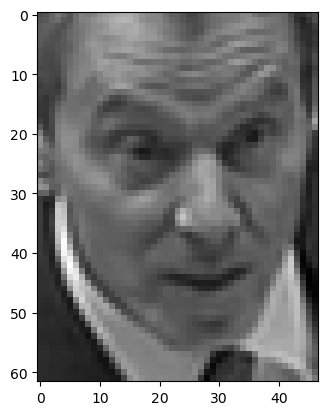

In [58]:
plt.imshow(faces.images[0], cmap='gray')

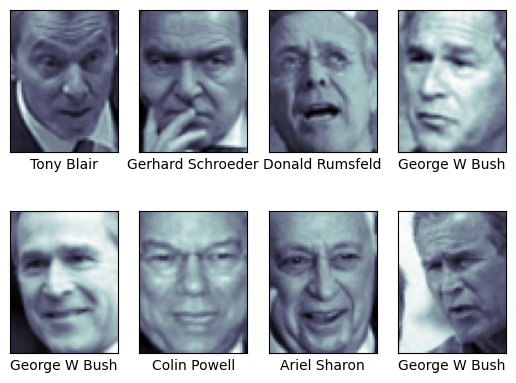

In [59]:
fig, ax = plt.subplots(2,4)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [60]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2)

In [62]:
param_grid = {
    'svc__C':[1,5,7,9,10,15,30,40],
    'svc__gamma':[0.00001, 0.0001, 0.001, 0.005]
}

grid = GridSearchCV(model, param_grid=param_grid)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 7, 9, 10, 15, 30, 40],
                         'svc__gamma': [1e-05, 0.0001, 0.001, 0.005]})

In [64]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [65]:
print(grid.best_estimator_)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.005))])


In [66]:
model = grid.best_estimator_

In [67]:
y_pred = model.predict(X_test)

In [68]:
y_test

array([ 3,  9,  6,  1,  4,  3,  1,  3,  5,  7,  9,  3,  8,  0,  3,  4,  3,
        3,  2,  1,  2,  6,  8,  9,  3,  3,  3, 11,  3,  2, 11,  3,  3,  3,
        4,  2,  1,  3,  3,  8,  9,  4,  1,  6,  1,  1,  1,  1,  3,  3, 11,
        3,  9,  3,  3, 11,  0,  3, 11,  3,  2, 11,  2,  1,  2,  4,  3,  1,
        1,  8, 11,  2,  6,  1,  4,  3,  1,  3,  6,  1,  3,  1,  3,  1,  9,
        5, 11,  3,  3,  0,  3,  1, 10,  3,  3,  4,  3,  6,  0,  1,  6,  7,
        2,  3,  7,  5,  2,  1,  5,  9,  3,  1,  3, 11, 11, 11,  3,  0,  1,
        0,  2,  1,  1,  4,  9,  3,  3,  7,  3,  9,  1,  1,  3,  5,  3,  6,
        8,  5,  2,  1,  5, 11,  3,  8,  3,  5,  0,  5,  3,  4,  3,  3,  6,
        3,  1,  3,  3,  4, 11,  3,  1,  3,  3,  6,  3,  3,  3,  3,  3,  1,
        0,  3,  3,  7,  7,  3,  3,  3,  2,  3, 10,  7,  9,  3,  1,  3,  1,
       11,  0,  2,  9,  4,  1,  2,  1,  1,  1,  1,  8,  3,  4,  3,  3,  1,
        3,  1,  0, 11,  3,  3, 10,  3,  1,  3,  1,  6,  1,  4,  3,  3,  6,
        3,  3,  3,  8,  4

In [69]:
y_pred

array([ 3, 11,  6,  1,  4,  4,  3,  3,  1,  0,  9,  3,  8,  0,  1,  4,  3,
        3,  2,  1,  3,  6,  8,  9,  3,  3,  3,  3,  3,  2, 11,  3,  3,  3,
        4,  2,  1,  3,  3,  3,  9,  4,  1,  6,  3,  1,  1,  1,  3,  3, 11,
        3,  9,  3,  3,  4,  0,  3, 11,  3,  2, 11,  2,  1,  2,  4,  3,  1,
        1,  8, 11,  2,  6,  1,  2,  3,  1,  3,  6,  1,  3,  1,  3,  1,  9,
        5, 11,  3,  3,  0,  3,  1, 10,  3,  3,  4,  3,  3,  0,  3,  6,  7,
        1,  3,  7,  5,  2,  1,  5,  9,  3,  1,  3, 11,  2, 11,  3,  0,  1,
        3,  2,  1,  1,  4,  9,  3,  3,  7,  3,  9,  1,  1,  3,  3,  3,  6,
        4,  3,  7,  1,  5, 11,  3,  3,  1,  5,  0,  3,  3,  4,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  3,  1,  3,  3,  1,  3,  3,  3,  3,  3,  1,
        0,  3,  3,  3,  7,  3,  3,  3,  2,  3, 10,  3,  9,  3,  1,  3,  1,
        3,  0,  2,  9,  4,  1,  2,  3,  1,  1,  1,  3,  3,  4,  3,  3,  1,
        3,  1,  0,  3,  3,  3, 10,  3,  1,  3,  1,  6,  1,  4,  3,  3,  6,
        3,  1,  3,  8,  3

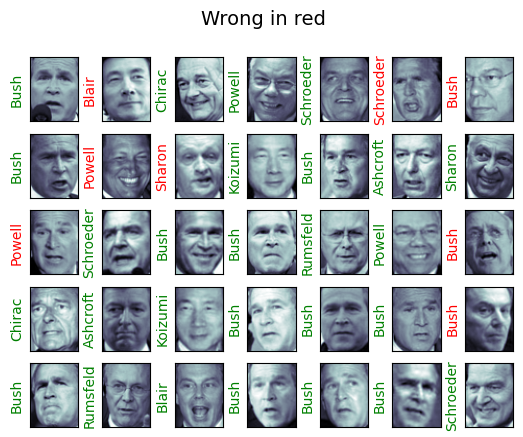

In [70]:
fig, ax = plt.subplots(5,7)
for i, idx in enumerate(ax.flat):
    idx.imshow(X_test[i].reshape(62,47), cmap='bone')
    idx.set(xticks=[], yticks=[])
    idx.set_ylabel(faces.target_names[y_pred[i]].split()[-1], color='green' if y_pred[i] == y_test[i] else 'red')
    fig.suptitle('Wrong in red', size=14)

In [71]:
print(classification_report(y_test,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.85      0.88        13
     Colin Powell       0.82      0.88      0.85        52
  Donald Rumsfeld       0.88      0.78      0.82        18
    George W Bush       0.81      0.96      0.88       119
Gerhard Schroeder       0.84      0.84      0.84        19
      Hugo Chavez       1.00      0.73      0.85        15
   Jacques Chirac       1.00      0.73      0.85        15
    Jean Chretien       0.86      0.60      0.71        10
    John Ashcroft       1.00      0.56      0.71         9
Junichiro Koizumi       1.00      0.92      0.96        12
  Serena Williams       0.83      0.83      0.83         6
       Tony Blair       0.94      0.71      0.81        24

         accuracy                           0.86       312
        macro avg       0.91      0.78      0.83       312
     weighted avg       0.87      0.86      0.85       312



Text(113.92222222222219, 0.5, 'Predicted Label')

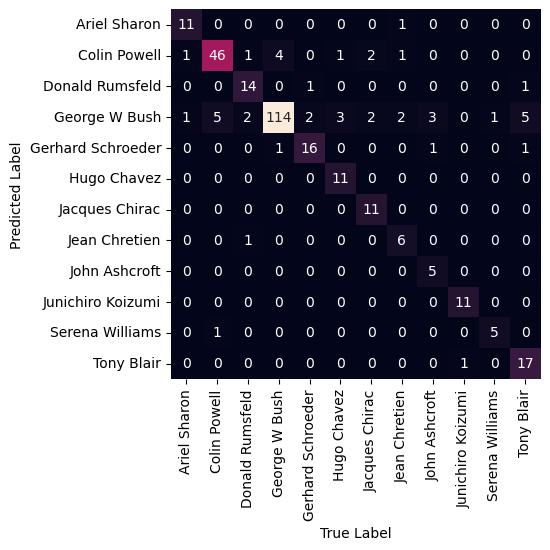

In [72]:
mx = confusion_matrix(y_test, y_pred)
sns.heatmap(mx.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names
            )

plt.xlabel('True Label')
plt.ylabel('Predicted Label')